In [1]:
pip install nltk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# skip unwantd rows

In [3]:
data=pd.read_excel("CO-O3.xlsx",skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])


In [4]:
data.columns

Index(['From Date', 'To Date', 'CO', 'Ozone'], dtype='object')

In [5]:
data.head()

,From Date,To Date,CO,Ozone
0,03-01-2020 00:00,03-01-2020 08:00,0.68,18.88
1,03-01-2020 08:00,03-01-2020 16:00,0.97,25.26
2,03-01-2020 16:00,04-01-2020 00:00,1.18,25.1
3,04-01-2020 00:00,04-01-2020 08:00,0.81,25.14
4,04-01-2020 08:00,04-01-2020 16:00,1.21,29


In [6]:
data.tail()

,From Date,To Date,CO,Ozone
3229,14-12-2022 08:00,14-12-2022 16:00,0.31,28.23
3230,14-12-2022 16:00,15-12-2022 00:00,1.41,20.52
3231,15-12-2022 00:00,15-12-2022 08:00,0.3,22.79
3232,15-12-2022 08:00,15-12-2022 16:00,0.29,30.02
3233,15-12-2022 16:00,15-12-2022 16:20,0.33,30.68


In [7]:
data.describe()

,From Date,To Date,CO,Ozone
count,3234,3234,3234,3234
unique,3234,3234,221,1910
top,03-01-2020 00:00,03-01-2020 08:00,None,None
freq,1,1,271,265


In [8]:
data.shape

(3234, 4)

# counting number of rows containing none values

In [9]:
data[data['CO']=="None"].value_counts()

From Date         To Date           CO    Ozone
01-03-2022 00:00  01-03-2022 08:00  None  None     1
27-01-2020 16:00  28-01-2020 00:00  None  None     1
26-02-2021 16:00  27-02-2021 00:00  None  None     1
26-02-2022 00:00  26-02-2022 08:00  None  None     1
26-02-2022 08:00  26-02-2022 16:00  None  None     1
                                                  ..
16-01-2020 08:00  16-01-2020 16:00  None  None     1
16-05-2021 00:00  16-05-2021 08:00  None  None     1
16-05-2021 08:00  16-05-2021 16:00  None  None     1
16-05-2021 16:00  17-05-2021 00:00  None  None     1
31-10-2021 16:00  01-11-2021 00:00  None  None     1
Length: 271, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  3234 non-null   object
 1   To Date    3234 non-null   object
 2   CO         3234 non-null   object
 3   Ozone      3234 non-null   object
dtypes: object(4)
memory usage: 101.2+ KB


In [11]:
data.isnull().sum()

From Date    0
To Date      0
CO           0
Ozone        0
dtype: int64

In [12]:
data.replace(to_replace="None",value=0.00,inplace=True)
data.head()

,From Date,To Date,CO,Ozone
0,03-01-2020 00:00,03-01-2020 08:00,0.68,18.88
1,03-01-2020 08:00,03-01-2020 16:00,0.97,25.26
2,03-01-2020 16:00,04-01-2020 00:00,1.18,25.10
3,04-01-2020 00:00,04-01-2020 08:00,0.81,25.14
4,04-01-2020 08:00,04-01-2020 16:00,1.21,29.00


# convert Data columns into pandas dataframe

In [13]:
type(data['From Date'][1])


str

In [14]:
type(data['From Date'][2])

str

In [15]:
type(data['From Date'][3])


str

In [16]:
data["From Date"]=pd.to_datetime(data['From Date'],format="%d-%m-%Y %H:%M")
data.head()

,From Date,To Date,CO,Ozone
0,2020-01-03 00:00:00,03-01-2020 08:00,0.68,18.88
1,2020-01-03 08:00:00,03-01-2020 16:00,0.97,25.26
2,2020-01-03 16:00:00,04-01-2020 00:00,1.18,25.10
3,2020-01-04 00:00:00,04-01-2020 08:00,0.81,25.14
4,2020-01-04 08:00:00,04-01-2020 16:00,1.21,29.00


In [17]:
type(data['From Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

# create a new column named day

In [18]:
data['Day']=data.index+1
data.head()

,From Date,To Date,CO,Ozone,Day
0,2020-01-03 00:00:00,03-01-2020 08:00,0.68,18.88,1
1,2020-01-03 08:00:00,03-01-2020 16:00,0.97,25.26,2
2,2020-01-03 16:00:00,04-01-2020 00:00,1.18,25.10,3
3,2020-01-04 00:00:00,04-01-2020 08:00,0.81,25.14,4
4,2020-01-04 08:00:00,04-01-2020 16:00,1.21,29.00,5


# Visualizing data

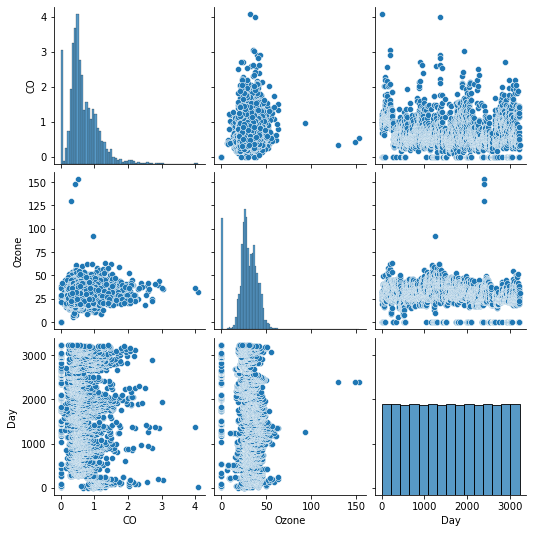

In [19]:
sns.pairplot(data)

In [20]:
data.corr()

,CO,Ozone,Day
CO,1.000000,0.369555,-0.112215
Ozone,0.369555,1.000000,-0.205429
Day,-0.112215,-0.205429,1.000000


<AxesSubplot:>

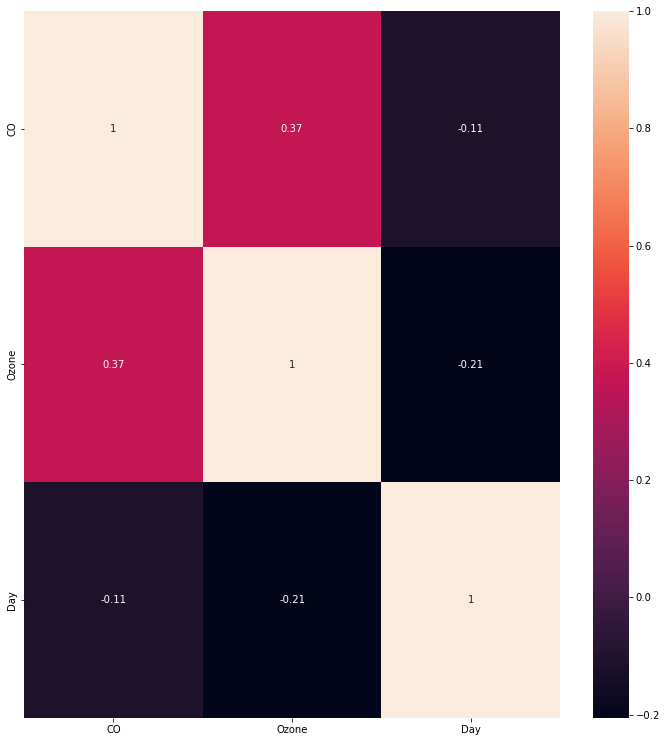

In [21]:
plt.figure(figsize=(12,13))
sns.heatmap(data.corr(),annot=True)

C:\Users\shree ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


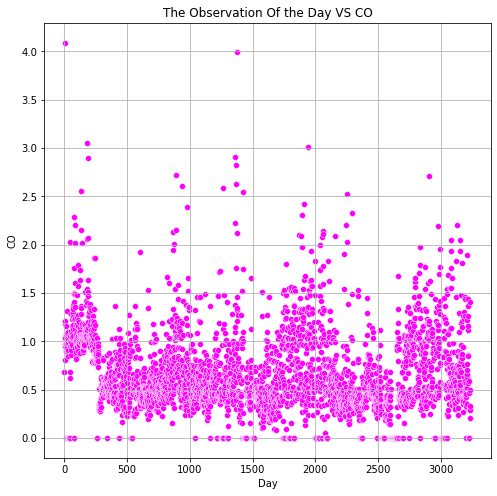

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data.Day,data.CO,color='magenta')
plt.title("The Observation Of the Day VS CO")
plt.grid()
plt.show()


C:\Users\shree ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


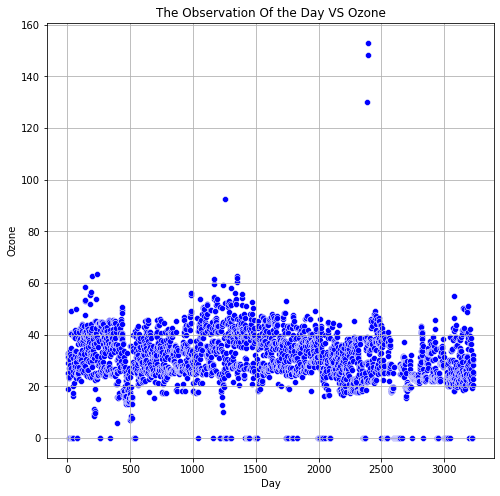

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(data.Day,data.Ozone,color='Blue')
plt.title("The Observation Of the Day VS Ozone")
plt.grid()
plt.show()

# Apply Whitegrid style 

In [24]:
sns.set(style="whitegrid")


C:\Users\shree ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


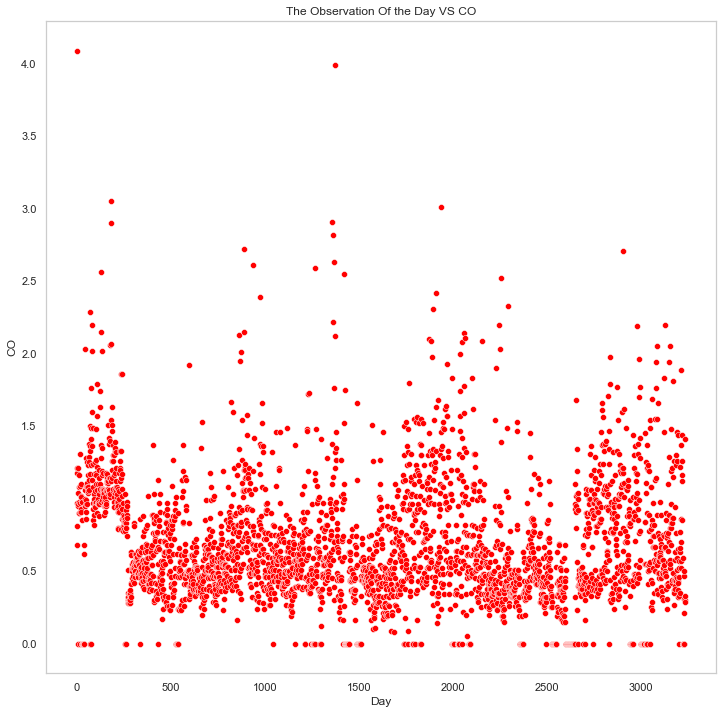

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(data.Day,data.CO,color='red')
plt.title("The Observation Of the Day VS CO")
plt.grid()
plt.show()

C:\Users\shree ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


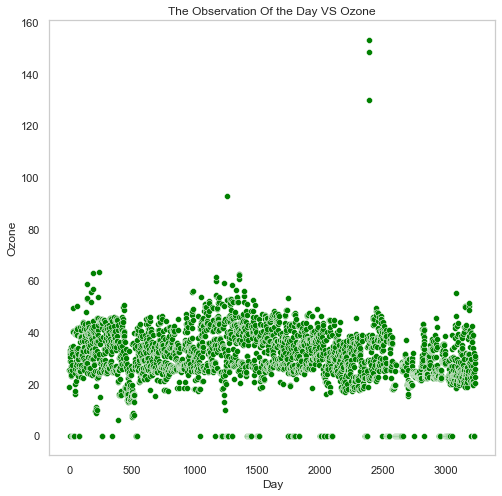

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(data.Day,data.Ozone,color='green')
plt.title("The Observation Of the Day VS Ozone")
plt.grid()
plt.show()